## Advertising Ad Campaign



## 1. Introduction

The task is to predict who will most likely click on the ad. Let's consider that we are working for a marketing company. Firstly, we have to understand what constitutes a profit and a loss.

Let's assume that you have a marketing campaign for which we spend 1000USD per potential customer. For each customer that we target with our ad campaign and that clicks on the ad, we get an overall profit of 100USD. However, if we target a customer that ends up not clicking on the ad, we incur a net loss of 1050USD. Therefore we can conclude that for each customer that was not targeted by the campaign and who clicks on the ad, we get an overall profit of 1100USD. Unfortunately, we have no information about the advertized product; this information could have guided us through our understanding of the user behavior.

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, make_scorer, fbeta_score
%matplotlib inline


# Defining categorical, numerical, and datetime variables that we will use later
categorical_vars = ["Ad Topic Line", "City", "Country"]
numerical_vars = ["Daily Time Spent on Site", "Area Income", "Daily Internet Usage", "Male", "log_age"]
datetime_vars = "Timestamp"
target = "Clicked on Ad"

## 2. Explore the dataset
    2.1 Explore the data

In [2]:
advertising_df = pd.read_csv('advertising_dsdj.csv')
advertising_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53,0.0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39,0.0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35,0.0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 2:31,0.0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 3:36,0.0


Let's look at the main characteristics of our dataset, such as the number of observations, the type of variables, the summary statistics for each variables, the number of missing data, etc

In [3]:
advertising_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1018 non-null   float64
 1   Age                       1018 non-null   int64  
 2   Area Income               1018 non-null   float64
 3   Daily Internet Usage      1018 non-null   float64
 4   Ad Topic Line             1018 non-null   object 
 5   City                      1018 non-null   object 
 6   Male                      1018 non-null   int64  
 7   Country                   1018 non-null   object 
 8   Timestamp                 1018 non-null   object 
 9   Clicked on Ad             1014 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 79.7+ KB


In [4]:
advertising_df.isnull().any()

Daily Time Spent on Site    False
Age                         False
Area Income                 False
Daily Internet Usage        False
Ad Topic Line               False
City                        False
Male                        False
Country                     False
Timestamp                   False
Clicked on Ad                True
dtype: bool

In [5]:
# Our Target variable contains null values. So we delete these values.
advertising_df = advertising_df.dropna(axis=0)

In [6]:
# Assessing if duplicated records are found in the dataset
print("The number of duplicated records in the dataset:", advertising_df.duplicated().sum())

The number of duplicated records in the dataset: 7


In [7]:
# Removing the duplicated rows from the dataset
advertising_df = advertising_df.drop_duplicates()

## 3. Exploratory Data Analysis
     3.1 Describe Features

In [8]:
# Check for class imbalance
click_rate = advertising_df['Clicked on Ad'].value_counts()

In [9]:
click_rate

1.0    506
0.0    501
Name: Clicked on Ad, dtype: int64

As we can see this is an balanced dataset so there is no issue of class imbalance.

In [10]:
# Descriptive Statistics 
advertising_df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,64.952403,36.958292,54899.398868,179.386514,0.482622,0.502483
std,15.850441,31.729539,13458.555374,44.548765,0.499946,0.500242
min,32.600000,-25.000000,13996.500000,23.640000,0.000000,0.000000
25%,51.270000,29.000000,46899.780000,138.490000,0.000000,0.000000
50%,68.100000,35.000000,56984.090000,182.200000,0.000000,1.000000
75%,78.535000,42.000000,65350.775000,218.550000,1.000000,1.000000
max,91.430000,999.000000,79484.800000,269.960000,1.000000,1.000000


As we can see the mean and the median are fairly same so there is no skwedness in data. Therefore we need not perform any transformation in data. 

But in the age column there is some difference as the min value is negative and max is 999. Lets investigate this stuff.

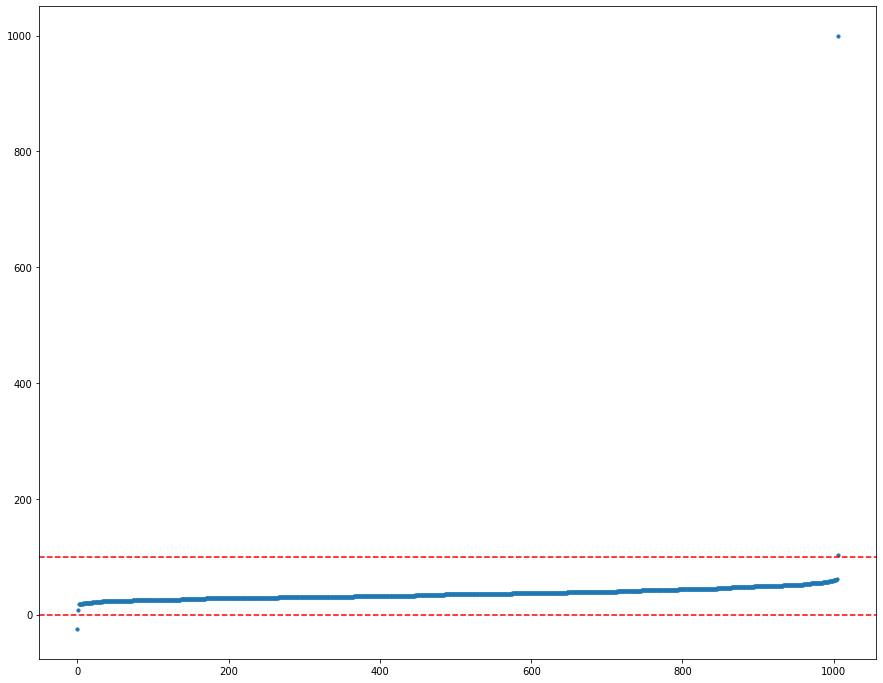

In [11]:
# Keep relevant values in age column.
sorted_age_arr = sorted(advertising_df['Age'])
idx = []
for i in range(len(sorted_age_arr)):
    idx.append(i)

x = idx
y = sorted_age_arr

plt.figure(figsize = (15,12))
plt.scatter(x, y, s=10)
plt.axhline(y=0, linestyle='--', color='r')
plt.axhline(y=100, linestyle='--', color='r')

In [12]:
# This dataset consist of uncertain age values which might not be helpful for the prediction. 
advertising_df[(advertising_df['Age'] > 100) | (advertising_df['Age'] < 18)]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
294,56.01,-25,46339.25,127.26,Re-engineered real-time success,Garciamouth,0,Tonga,2016-07-05 18:59,1.0
495,50.60,999,34191.13,129.88,Realigned reciprocal framework,New Daniellefort,1,United States of America,2016-05-03 12:57,1.0
604,57.20,103,57739.03,110.66,Innovative maximized groupware,East Heatherside,0,New Zealand,2016-03-19 11:09,1.0
823,43.16,8,25371.52,156.11,Implemented didactic support,Williamsport,1,Marshall Islands,2016-07-06 3:40,1.0


In [13]:
# Remove extreme age values
advertising_df = advertising_df[(advertising_df['Age'] >= 18) & (advertising_df['Age'] < 100)]

In [14]:
advertising_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53,0.0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39,0.0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35,0.0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 2:31,0.0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 3:36,0.0


In [15]:
advertising_df['Age'].max()

61

In [16]:
# Let's check out if the 'Daily Time Spend on Site' 
# is actually smaller or equal to the Daily Internet Usage'

advertising_df['delta'] = advertising_df['Daily Internet Usage'] - advertising_df['Daily Time Spent on Site']
sum(advertising_df['delta'] < 0)

3

In [17]:
# Removing rows with a delta smaller than zero
advertising_df = advertising_df[advertising_df['delta'] >= 0]

# I'll remove the column that I just created, but you could definitely keep it :-) 
advertising_df = advertising_df.drop('delta', axis=1)

### 3.2 Distribution Plots

In [18]:
# Functions that we will use later on
def data_info(data):
    return data.info()

def creating_boxplots(size, target, features, data):
    plt.figure(figsize=size)
    for i in range(len(numerical_vars)):
        plt.subplot(5, 3, i+1)
        sns.boxplot(x=target, y=features[i], data=data )
        
def creating_distplot(size, data, features):
    plt.figure(figsize=size)
    for i in range(len(features)):
        plt.subplot(5, 3, i+1)
        sns.distplot(data[features[i]])
        
def crossCorrelation(data):
    corr = data.corr()
    plt.figure(figsize=(10,6))
    sns.heatmap(corr, 
          xticklabels=corr.columns.values,
          yticklabels=corr.columns.values)
    print(corr)


In [19]:
num_vars = advertising_df.select_dtypes(exclude=['object', 'datetime64']).columns

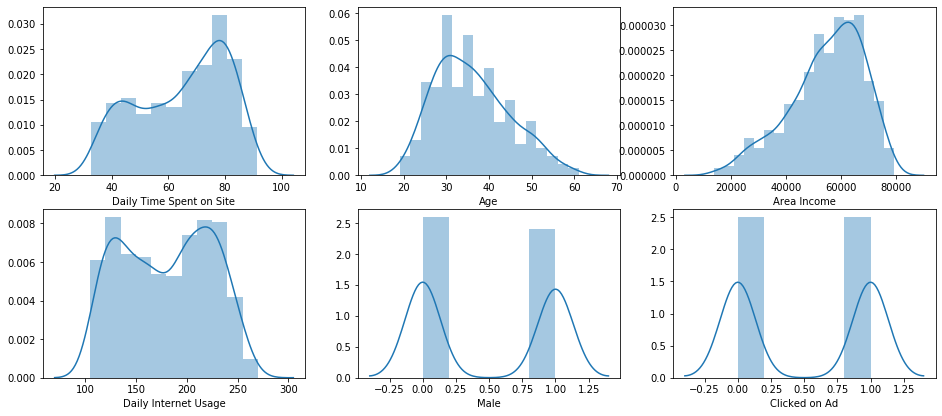

In [20]:
creating_distplot((16,18), advertising_df, num_vars)

### 3.3 CrossCorrelation Plot

                          Daily Time Spent on Site       Age  Area Income  \
Daily Time Spent on Site                  1.000000 -0.331513     0.310954   
Age                                      -0.331513  1.000000    -0.182605   
Area Income                               0.310954 -0.182605     1.000000   
Daily Internet Usage                      0.518658 -0.367209     0.337496   
Male                                     -0.018951 -0.021044     0.001322   
Clicked on Ad                            -0.748117  0.492531    -0.476255   

                          Daily Internet Usage      Male  Clicked on Ad  
Daily Time Spent on Site              0.518658 -0.018951      -0.748117  
Age                                  -0.367209 -0.021044       0.492531  
Area Income                           0.337496  0.001322      -0.476255  
Daily Internet Usage                  1.000000  0.028012      -0.786539  
Male                                  0.028012  1.000000      -0.038027  
Clicked on Ad   

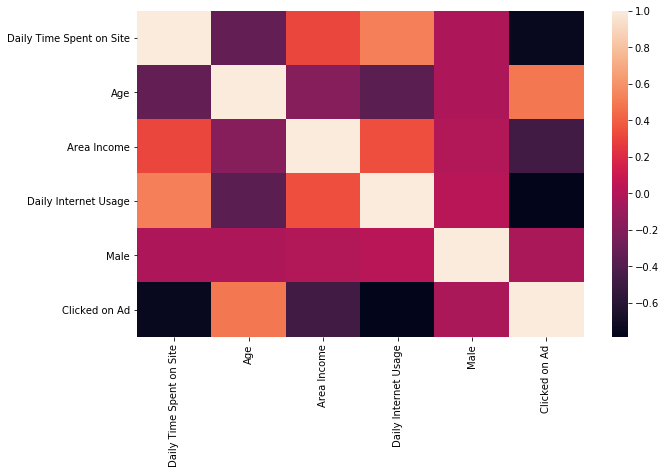

In [21]:
# Identifying the correlation between features and target variable
crossCorrelation(advertising_df)

The cross-correlation revealed interesting potential relationship between our target feature and all the features except sex. Now, we would need to keep these relationship in mind since there seems to be some collinearity between the explanatory features as well.

### 3. 4 Distribution Plot with respect to Target variable

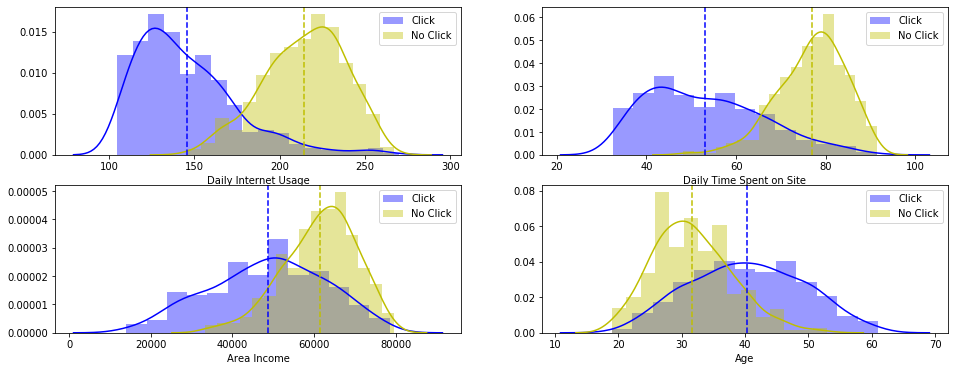

In [22]:
# Subsetting the groups in target variable
click_yes = advertising_df["Clicked on Ad"] == 1
click_no = advertising_df["Clicked on Ad"] == 0

# Creating the plots
features = ["Daily Internet Usage", "Daily Time Spent on Site", "Area Income", "Age"]
labels = ["Click", "No Click"]

def creating_plots(features, labels):
    plt.figure(figsize=(16,6))
    for feature in features:
        plt.subplot(2, 2, features.index(feature)+1)
        sns.distplot(advertising_df[feature][click_yes], label=labels[0], color="b")
        sns.distplot(advertising_df[feature][click_no], label=labels[1], color="y")
        plt.axvline(advertising_df[feature][click_yes].mean(), linestyle = '--', color="b")
        plt.axvline(advertising_df[feature][click_no].mean(), linestyle = '--', color="y")
        plt.legend()

creating_plots(features, labels)

Regarding the categorical variables, we have almost all different cities, and we do not observe a huge amount of people within the same city, so we can guess that this feature has probably no predictive power. 
However, we have less diversity when it comes down to the different countries. Therefore we will take a look at the distribution of our sample with regards to the feature "Country".

In [23]:
table_country = pd.crosstab(index = advertising_df['Country'],
                           columns = 'count')
table_country.sort_values(['count'],ascending=False).head(10)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


We see to it that values across the country remain the same more less the same. So it may not be that useful to in predicting the customers who will click on the ads.

## 4 Feature Egineering

Before performing machine learning, we will transform some features to avoid introducing some bias due to the overall distribution of the latter. As mentioned previously, we have some skewed distributions and they can make our models underperformed. To potentially solve this issue, we will apply a logarithmic transformation to reduce the effect of outliers and reduce the distribution's range.

From our previous EDA, we observe that "Age" was right skewed; therefore this transformation will be applied to this feature.

In [24]:
advertising_df["log_age"] = np.log(advertising_df["Age"])

In [25]:
advertising_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,log_age
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53,0.0,3.555348
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39,0.0,3.433987
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35,0.0,3.258097
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 2:31,0.0,3.367296
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 3:36,0.0,3.555348


As stated earlier, some of these features would require me to perform NLP and Time-series analysis which will be performed later. 

In [26]:
ad_df = advertising_df.drop(['Ad Topic Line', 'City', 'Timestamp', 'Country'], axis=1)

In [27]:
ad_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,log_age
0,68.95,35,61833.90,256.09,0,0.0,3.555348
1,80.23,31,68441.85,193.77,1,0.0,3.433987
2,69.47,26,59785.94,236.50,0,0.0,3.258097
3,74.15,29,54806.18,245.89,1,0.0,3.367296
4,68.37,35,73889.99,225.58,0,0.0,3.555348


### 4.1 Normalization of Features

In [28]:
# Defining the numerical, categorical and target features.
categorical_vars = ["Ad Topic Line", "City", "Country"]
numerical_vars = ["Daily Time Spent on Site", "Area Income", "Daily Internet Usage", "Male", "log_age"]
datetime_vars = "Timestamp"
target = "Clicked on Ad"

#Initialize the scaler, MinMaxScaler
scaler = MinMaxScaler() #default (0,1)

# Convert into dataframe
data = pd.DataFrame(data=ad_df)
data[numerical_vars] = scaler.fit_transform(data[numerical_vars])

data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,log_age
0,0.617882,35,0.730472,0.916031,0.0,0.0,0.523740
1,0.809621,31,0.831375,0.538746,1.0,0.0,0.419696
2,0.626721,26,0.699200,0.797433,0.0,0.0,0.268903
3,0.706272,29,0.623160,0.854280,1.0,0.0,0.362521
4,0.608023,35,0.914568,0.731323,0.0,0.0,0.523740


## 5. Model Selection

For this particular example lets choose appropriate models. Since we need to know the exact features which are responsible for prediction, Logistic Regression will be the best.

In [29]:
# Splitting the dataset into train and test set
X, y = data.drop([target, "Age"],1).values, data[target].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,
                                                   random_state = 42,
                                                   stratify = y)

In [30]:
# Just an sanity check
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 5)
(200, 5)
(800,)
(200,)


In [31]:
from sklearn.linear_model import LogisticRegression

parameters = {"C": [5.5,6.5,7,7.5,8.5,9.5]}

model = LogisticRegression(random_state=42, penalty="l2")

# fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Grid Search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(model, param_grid=parameters, scoring=scorer)

In [45]:
# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
best_predictions = best_clf.predict(X_train)
# Report the scores
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_train, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_train, best_predictions, beta = 0.5)))
print(best_clf)


Optimized Model
------
Final accuracy score on the testing data: 0.9700
Final F-score on the testing data: 0.9785
LogisticRegression(C=5.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


From the logisitic regression, with a model including most of our features, our best result on the training set are:

   **1. Accuracy of 97.00%**

   **2. F-score of 97.85%**
    
with L2-Regularization with C=5.5.

Let's look at other metrics such as the precision and recall

In [33]:
# Confusion Matrix

confmat = confusion_matrix(y_train, best_predictions)
print("The Confusion Matrix:\n", confmat)
print("Precision Score:", round(precision_score(y_train, best_predictions), 2))
print("Recall Score:", round(recall_score(y_train, best_predictions), 2))

The Confusion Matrix:
 [[394   6]
 [ 18 382]]
Precision Score: 0.98
Recall Score: 0.96


Because of our business problem, we want to focus on **lowering the false positive** since they are costing the company money when we spend money on a client that does not click on the ad. It is worth noting that considering the amount of profit the company is making following the campaign and the amount of money that is being made from false negatives, it is definitely worth it NOT to make any campaign and hoping for a maximum number of false negatives.
However, let's say that we can get more insights with our clients by identifying potential features that would support the idea if a client will click on our ad or not. Therefore, we want to have an interpretable model that has a **great precision to minimize the false positive** which incur loss of money, and a model that could have a **lower specificity (e.g., recall) which increases profit anyway**. Actually if it costs 1000USD to target a customer and brings an overall profit of 100USD, then we can estimate that the overall profit from someone clicking on the ad is 1100USD. Therefore, **it is definitely worth it to have false negative**.  

In [34]:
def summary_metrics(y, y_pred):
    confMat = confusion_matrix(y, y_pred)
    TP = confMat[0,0]
    FN = confMat[0,1]
    FP = confMat[1,0]
    TN = confMat[1,1]
    
    # Print the confusion matrix
    print("Confusion Matrix:", confMat)
    
    # Print the accuracy score
    print("Accuracy score:", round(accuracy_score(y,y_pred),2))
    
    # Print the Recall score
    print("Recall score:", round(recall_score(y,y_pred),2))
    
    # Print the precision score
    print("Precision score:", round(precision_score(y,y_pred),2))
    
    print("")
    print("DETAILS")
    
    
    # RETURN ON TP
    print("True Positive:", round((float(TP)*100),2))
    
    # Return on FP
    print("False Positive:", round((float(FP) * -1050),2))
    
    # Return on FN
    print("False Negative:", round((float(FN) * 1100),2))
    
    # Return on TN
    print("True Negative:", round((float(TN) * 0), 2))
    
    # Return on investment
    investment_return = (TP * 100) + (FP * -1050) + (FN * 1100) + (TN * 0)
    print("Profit:", round(float(investment_return),2), "$")



In [35]:
# Getting the metrics from the confusion matrix with our best model on our training set
print(summary_metrics(y_train, best_predictions))

Confusion Matrix: [[394   6]
 [ 18 382]]
Accuracy score: 0.97
Recall score: 0.96
Precision score: 0.98

DETAILS
True Positive: 39400.0
False Positive: -18900.0
False Negative: 6600.0
True Negative: 0.0
Profit: 27100.0 $
None


As mentioned previously, let's look at the probability distribution of our model to see if increasing the threshold could be beneficial to reduce the number of false positive, consequently reducing our loss.

In [48]:
y_pred_prob = best_clf.predict_proba(X_train)[:,1]

Text(0, 0.5, 'Frequency')

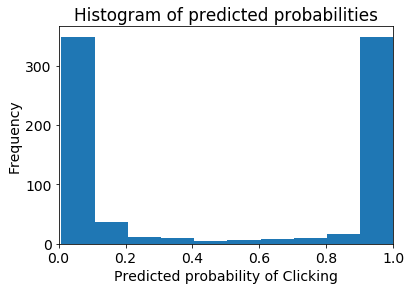

In [49]:
plt.rcParams["font.size"] = 14
plt.hist(y_pred_prob, bins = 10)
plt.xlim(0,1)
plt.title("Histogram of predicted probabilities")
plt.xlabel("Predicted probability of Clicking")
plt.ylabel("Frequency")

It looks like our model does not carry a lot of ambiguity when it comes down to predicting if someone will click on the ad or not. We could still raise our threshold to 0.65 to decrease the chance of a false positive, even though our current model seems quite categorical.

In [50]:
y_pred_prob = best_clf.predict_proba(X_train)[:, 1]
y_pred_class = np.where(y_pred_prob<0.30, 0, 1)
summary_metrics(y_train, y_pred_class)

Confusion Matrix: [[389  11]
 [  9 391]]
Accuracy score: 0.98
Recall score: 0.98
Precision score: 0.97

DETAILS
True Positive: 38900.0
False Positive: -9450.0
False Negative: 12100.0
True Negative: 0.0
Profit: 41550.0 $


By decreasing the threshold from 0.5 to 0.45, we helped reducing the number of false positives (e.g., 1), which result in a benefit. However, it is important to highlight that decreasing the threshold, even if it helps reducing the amount of false positives, the prediction of still having false negative customers clicking on the ad is to be closely monitored. 

Let's look at our test set to see how we would perform with this model

In [44]:
test_predictions = best_clf.predict(X_test)
summary_metrics(y_test, test_predictions)

Confusion Matrix: [[96  4]
 [ 3 97]]
Accuracy score: 0.96
Recall score: 0.97
Precision score: 0.96

DETAILS
True Positive: 9600.0
False Positive: -3150.0
False Negative: 4400.0
True Negative: 0.0
Profit: 10850.0 $


Considering out test set which included a sample size of 200 customers, we predict that our **overall profit would be 10850.0usd**. This prediction includes 
- **Profit of 9600usd from true positives**
- **Profit of 4400usd from false negatives**
- **Loss of 3150usd from false positives**

Indeed false negatives are extremely rewarding considering this particular problem. 
On the other hand, we lose 3150usd from mistakingly targeting customers that will not click on the ad. We have a loss that is the result of a misclassification, which in our case, is the equivalent of close to 2% of our overall prediction ( e.g., 3/200), and it corresponds to false positive rate (e.g., 3/97). We can state that the results are excellent considering the marging of error and the predicted profit.



## 5. Actionable Recommendations
According to our model, we can identify potential clients by getting information about users on:

- Daily Time Spent on site
- Daily Internet Usage
- Age
- Area income

By getting this information, we can target new customers with our ad campaign to maximize the chance of a return on investment. We can speculate that the level of education could correlate with our finding since it was been previously reported that there is a correlation between the income and the level of education. 
From our exploratory data analysis and our machine learning results, our ***targeted population*** would be customers with:

- **Lower income**
- **Spending less time on the website**
- **Spending less time on the internet**
- **Who are older than our average sample (mean around 40 years old)**

Also by increasing our threshold from our model, we can minimize the false positives (e.g., minimizing loss) which optimizes our business approach.